## Assignment 6 - Unit Test Your Functions!

Follow the instructions in the following notebook cell. You will be graded on:

    - Whether your unit tests are passing
    - The completion of this notebook

## Part 1:

In [59]:
%load_ext autoreload
%autoreload 2

# import the stuff you need here: os, glob, natsort, numpy, matplotlib.pyplot, pandas:

# example import, don't edit this.
import sys
sys.path.append('../')   # appending your project to python path

# import the rest: 
import pandas as pd
from importlib import reload
import matplotlib.pyplot as plt 
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Data I/O:

First, in the `utils.py` file from the `functions` folder, recreate the function to get all the `.csv` data files:

```python
def get_files(path_pattern):
    Given a `path_pattern` describing the path to all your data files, sorts the matching data files in alphanumerical order and returns a list with all file paths.

    Input: 
        path_pattern (list): Path to all data files as described by a wildcard (*)
    Returns:
        files (list): Alphanumerical sorted list of all data files matching your path_pattern description.
```

Import it using relative imports and use it in the following cells to load your data. Remember `.`

In [60]:
# first import your utility function:
from functions.utils import get_files

# Provide the wildcard (*) string pattern for your data files:
data_pattern = "data/*.csv"

data_pattern = "data/_105_1_cyan.csv"

# Use your utilities function to read and return a list of sorted data files: 
data_files = get_files(data_pattern)
print('There are {} data csv files in the data folder'.format(len(data_files)))




There are 1 data csv files in the data folder


### Create DataFrame:

Use `pandas` to load your `.csv` file data and turn them into a `dataframe`, then display the first 5 entries of your `dataframe`:

In [61]:
# read in your csv files, concatenate all the csv's one by one into columns, and replace empty entries with 0's
dfs =  (pd.read_csv(f) for f in data_files)
df = pd.concat (dfs)
df 
df.fillna (0)
print (df.columns) 


# assign column numbers to your data frame
df.columns = [0, 1]

# Show the first 5 entries of your dataframe:
df [0: 5] 



Index([' ', 'Value'], dtype='object')


,0,1
0,1,262.916
1,2,261.190
2,3,260.797
3,4,259.653
4,5,262.665


### Realign our dataframes so we match the peak fluorescent signals:

In `functions.utils.py`, add the following functions:

 - `find_middle()` - find the middle index of input data column and returns it
 - `realign_data()` - Center data around maximum or center of shortest column, padding with 0's, returns 1) a new dataframe with realigned columns and 2) the amount each column was shifted

In `tests` folder, create a file named `test_utils.py` and add the following unit tests functions:

 - `test_find_middle_even()` - 
 - `test_find_middle_odd()` - 
 - `test_realign_max()` - 

Use your terminal to test these functions with `pytest assignment/tests`. Once all your tests are passing, import the functions and use them in the following cells:

In [62]:
# from functions.utils import get_files1

import functions.utils 
reload (functions.utils)
print (dir(functions.utils))

# realign your data around its maximum or center, whichever one you like better: 
df_aligned, shifts = functions.utils.realign_data(df)

print('My realigned data frame has shape {}'.format(df_aligned.shape))

['__builtins__', '__cached__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'find_middle', 'get_files', 'get_files1', 'glob', 'np', 'pd', 'realign_data']
0
My realigned data frame has shape (46, 2)


### Normalize signal and visualize:

Now we can normalize each column between 0-1 using `scikitlearn`'s `minmaxscale` function and visualize them. <em> In your plots, properly label all axis and colorbars with appropriate name description and units:

In [63]:
# Normalize every column entry of your realigned dataframe:
from sklearn.preprocessing import MinMaxScaler

# pre-allocate an empty dataframe of 0's to be filled with normalized values, the index and column of this dataframe will be the same as the df_aligned dataframe:

normalized_array = scaler.transform(df_aligned)
#df_normalized = pd.DataFrame(normalized_array, columns = df_aligned.columns)

df_normalized = pd.DataFrame(columns = df_aligned.columns)



# fill in the `df_normalized` dataframe with normalized columns:
for column, vals in df_aligned.iteritems():
    # find the indices of the column that are not 0, only normalize those:
    ind = df_aligned.index[df_aligned[column]!=0].tolist()
    df_normalized[column] = vals[ind]
    # Normalize of those:


scaler = MinMaxScaler()
scaler.fit(df_normalized)
normalized_array = scaler.transform(df_normalized)


df_normalized = pd.DataFrame(normalized_array, columns = df_aligned.columns).fillna(0)





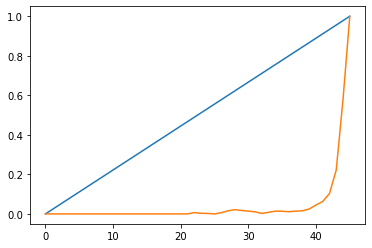

In [64]:
# Use matplotlib to plot all the fluorescent signals:
plt.plot(df_normalized)


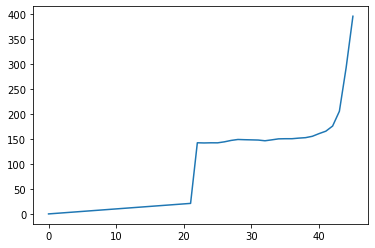

In [65]:
# Now instead of all signals, plot the average signal:
# use numpy to find the mean first:
mean_signal = np.zeros(df_aligned.shape[0])
for index, row in df_aligned.iterrows():
    val = row[row != 0] 
    mean_signal[index] = np.mean(val)

#plot
plt.plot(mean_signal)

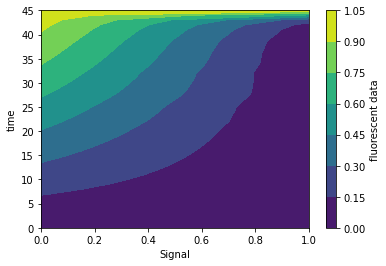

In [66]:
# Finally visualize your aligned, and normalized fluorescent data in a heatmap:

cntr = plt.contourf(df_normalized)
cbar=plt.colorbar(cntr)

plt.xlabel("Signal")
plt.ylabel("time") 

cbar.set_label("fluorescent data")



## Part 2:

Repeat the analysis, but instead of realigning the fluorescent signals to it's maximum peaks. Modify the `realign_data` function so that it requires a second input named `aligned`. In the function, if `align == "max"`, the code executes the max peak alignment like before.

But if `align == "center"`, the function will find the mid point of `input_data[column ! = 0]`, the middle index of non-zero values. Then shifts the values according to the new criteria.

After adding this feature to `functions.utils.realign_data`, write the appropriate test for this new feature in `tests.test_utils.py`, make sure this test is passing. Then implement the new alignment and revisualize the results, again making sure all axis and colorbars are properly labeled:

In [67]:
# apply your new realignment here

df_aligned, shifts = functions.utils.realign_data(df, align = "center")

df_normalized = pd.DataFrame(columns = df_aligned.columns)



# fill in the `df_normalized` dataframe with normalized columns:
for column, vals in df_aligned.iteritems():
    # find the indices of the column that are not 0, only normalize those:
    ind = df_aligned.index[df_aligned[column]!=0].tolist()
    df_normalized[column] = vals[ind]
    # Normalize of those:


scaler = MinMaxScaler()
scaler.fit(df_normalized)
normalized_array = scaler.transform(df_normalized)


df_normalized = pd.DataFrame(normalized_array, columns = df_aligned.columns).fillna(0) 




0


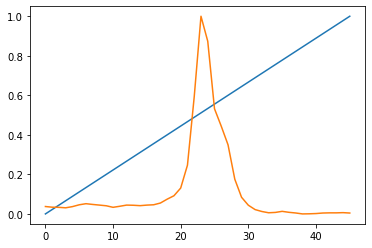

In [68]:
# visualize all of the newly aligned data
plt.plot(df_normalized)

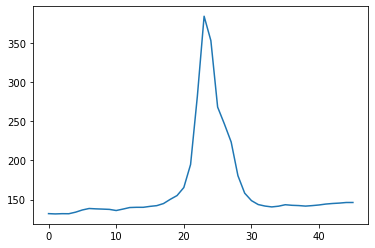

In [69]:
# visualize the mean of the newly aligned data

mean_signal = np.zeros(df_aligned.shape[0])
for index, row in df_aligned.iterrows():
    val = row[row != 0] 
    mean_signal[index] = np.mean(val)

#plot
plt.plot(mean_signal)

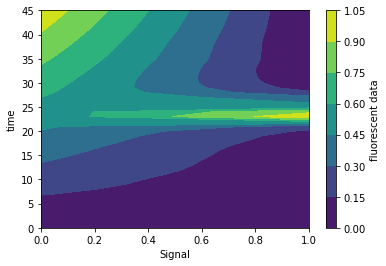

In [70]:
# visualize the heatmap 
cntr = plt.contourf(df_normalized)
cbar=plt.colorbar(cntr)

plt.xlabel("Signal")
plt.ylabel("time") 

cbar.set_label("fluorescent data")

Lastly, push your submission branch, the `pytests` should automatically be executed upon your push. Make sure these tests are passing! Again, add me as a collaborator, and a reviewer in your pull request that merges `submission` into `main`. 